In [1]:
#Run this if the below package not already installed

!pip install yfinance
!pip install seaborn

In [2]:
# Import yfinance package
import yfinance as yf

In [3]:
# Set the start and end date
start_date = '2022-01-01'
end_date = '2022-07-01'

In [4]:
# Set the ticker
ticker = 'GTLB'

In [5]:
# Get the data from yahoo finance
data = yf.download(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [6]:
#Observe last five records

data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-24,53.730000,55.439999,51.840000,54.360001,54.360001,2104100
2022-06-27,57.660000,57.950001,52.599998,53.959999,53.959999,1768200
2022-06-28,53.619999,55.195000,50.900002,51.630001,51.630001,1383300
2022-06-29,51.130001,53.639999,50.029999,53.419998,53.419998,1433700
2022-06-30,52.759998,54.549999,49.480000,53.139999,53.139999,1690000


In [7]:
# Observe first five records

data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,87.449997,88.169998,79.739998,80.570000,80.570000,761700
2022-01-04,80.209999,80.540001,72.500000,77.989998,77.989998,1599400
2022-01-05,77.010002,77.099998,66.779999,68.870003,68.870003,1552800
2022-01-06,70.180000,73.989998,67.000000,69.940002,69.940002,1180500
2022-01-07,69.940002,74.040001,68.050003,70.690002,70.690002,503900


In [8]:
# Import matplotlib to plot the data

import matplotlib.pyplot as plt
%matplotlib inline

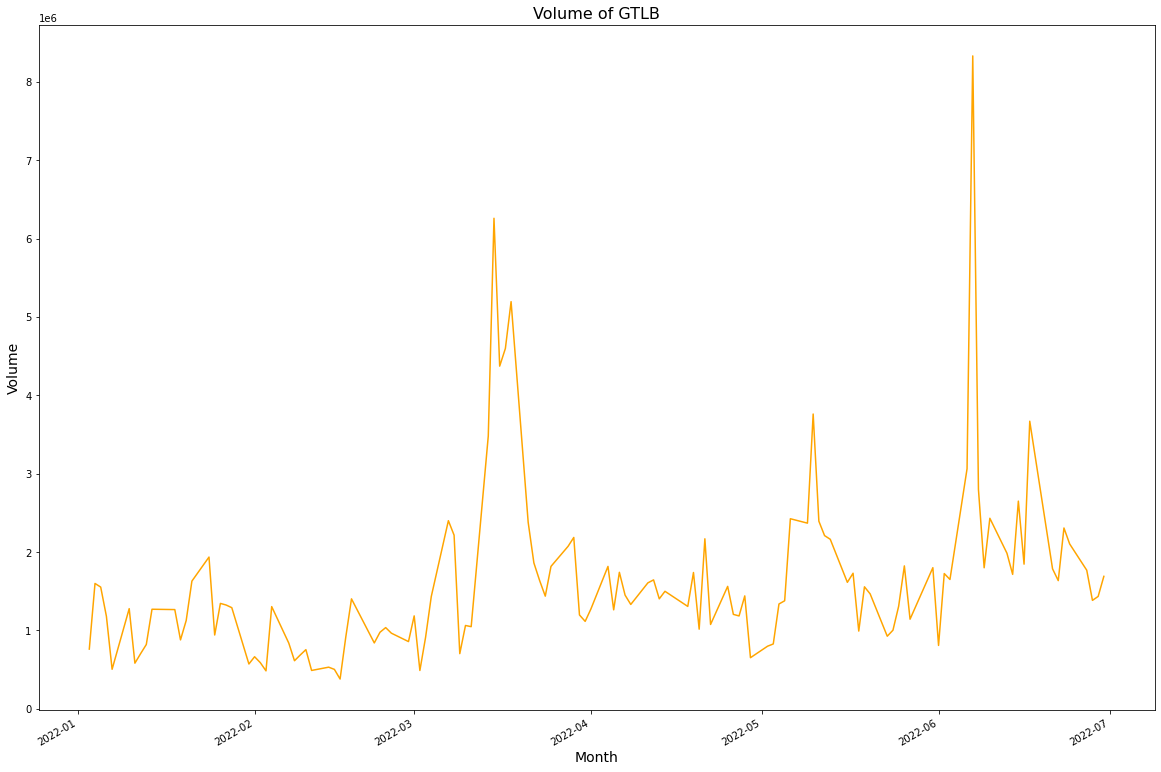

In [9]:
# Plot the volume data
data['Volume'].plot(figsize=(20, 14), color='orange')
# Give a title
plt.title("Volume of %s" % ticker, fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Volume', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.show()

In [10]:
# Import Pandas 
import pandas as pd

# Define the ticker list
tickers_list = ['GTLB', 'TEAM']

# Create placeholder for data
data = pd.DataFrame(columns=tickers_list)

# Fetch the data
for ticker in tickers_list:
    data[ticker] = yf.download(ticker, 
                               start_date,
                               end_date)['Volume']
    
# Print first 5 rows of the data
data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,GTLB,TEAM
Date,,
2022-01-03,761700,1681700
2022-01-04,1599400,4131600
2022-01-05,1552800,3509600
2022-01-06,1180500,2293700
2022-01-07,503900,2220700


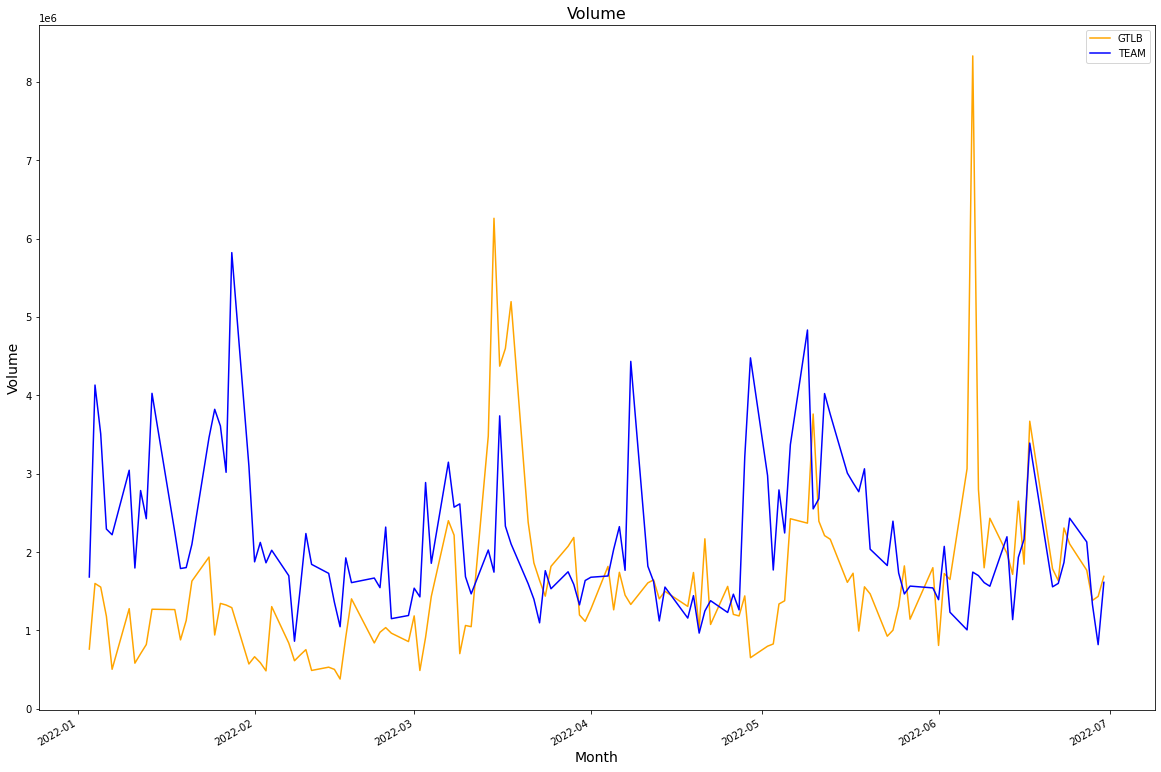

In [11]:
# Plot all the volume data
data.plot(figsize=(20, 14), color=["orange", "blue"])

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Volume", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Volume', fontsize=14)
plt.xlabel('Month', fontsize=14)

plt.show()

In [12]:
# Set the ticker as GTLB
gtlb = yf.Ticker("GTLB")

In [13]:
# Income Statement
gtlb.financials

,2022-01-31,2021-01-31,2020-01-31
Research Development,97217000.0,106643000.0,59364000.0
Effect Of Accounting Charges,None,None,None
Income Before Tax,-159071000.0,-189362000.0,-129541000.0
Minority Interest,24403000.0,24403000.0,24403000.0
Net Income,-155138000.0,-192194000.0,-130741000.0
Selling General Administrative,253908000.0,240954000.0,140854000.0
Gross Profit,222668000.0,133713000.0,71851000.0
Ebit,-128457000.0,-213884000.0,-128367000.0
Operating Income,-128457000.0,-213884000.0,-128367000.0
Other Operating Expenses,None,None,None


In [14]:
# Gathering Gross Profit Data and putting into a dataframe

gp = gtlb.financials.loc['Gross Profit']
gp_df = pd.DataFrame(columns=["Year", "Gross Profit"])
gp_df["Year"] = gp.index
gp_df["Year"] = pd.DatetimeIndex(gp_df["Year"]).year
gp_df["Gross Profit"]=gp.values

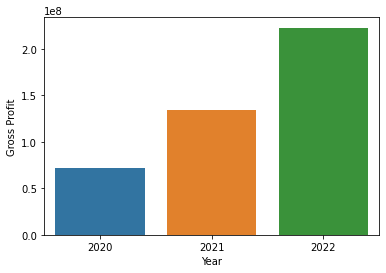

In [15]:
#Importing Seaborn package
import seaborn as sns

#Plotting Gross Profit
sns.barplot(data=gp_df, x="Year", y="Gross Profit")
plt.show()

In [16]:
gtlb.balance_sheet

,2022-01-31,2021-01-31,2020-01-31
Intangible Assets,6.285000e+06,797000.0,NaN
Capital Surplus,1.320479e+09,186892000.0,67168000.0
Total Liab,2.921690e+08,168884000.0,101449000.0
Total Stockholder Equity,7.748660e+08,-231222000.0,-134747000.0
Minority Interest,2.440300e+07,NaN,NaN
Deferred Long Term Liab,1.474300e+07,11776000.0,5727000.0
Other Current Liab,1.845890e+08,104974000.0,62292000.0
Total Assets,1.091438e+09,362566000.0,391848000.0
Other Current Assets,2.882600e+07,21110000.0,10516000.0
Retained Earnings,-5.533370e+08,-398199000.0,-206005000.0


In [17]:
# Gathering Total Stockholder Equity and putting into a dataframe

se = gtlb.balance_sheet.loc['Total Stockholder Equity']
se_df = pd.DataFrame(columns=["Year", "Total Stockholder Equity"])
se_df["Year"] = gp.index
se_df["Year"] = pd.DatetimeIndex(se_df["Year"]).year
se_df["Total Stockholder Equity"]=se.values

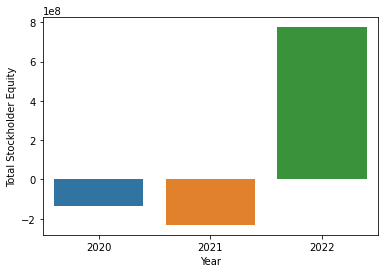

In [18]:
#Plotting Total Stockholder Equity
sns.barplot(data=se_df, x="Year", y="Total Stockholder Equity")
plt.show()

In [19]:
gtlb.cashflow

,2022-01-31,2021-01-31,2020-01-31
Investments,-50031000.0,-50031000.0,-50031000.0
Change To Liabilities,80951000.0,53856000.0,42864000.0
Total Cashflows From Investing Activities,-53895000.0,-842000.0,-842000.0
Total Cash From Financing Activities,701185000.0,12945000.0,271265000.0
Change To Operating Activities,-20153000.0,-27170000.0,-12043000.0
Issuance Of Stock,679992000.0,13765000.0,3088000.0
Net Income,-155138000.0,-192194000.0,-130741000.0
Change In Cash,604322000.0,-60477000.0,210873000.0
Repurchase Of Stock,-590000.0,-820000.0,-820000.0
Effect Of Exchange Rate,6846000.0,1000000.0,-226000.0


In [20]:
# Gathering Total Cash From Operating Activities and putting into a dataframe

cc = gtlb.cashflow.loc['Total Cash From Operating Activities']
cc_df = pd.DataFrame(columns=["Year", "Total Cash From Operating Activities"])
cc_df["Year"] = cc.index
cc_df["Year"] = pd.DatetimeIndex(cc_df["Year"]).year
cc_df["Total Cash From Operating Activities"]=cc.values

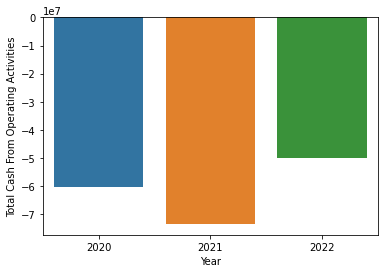

In [21]:
#Plotting Total Cash From Operating Activities
sns.barplot(data=cc_df, x="Year", y="Total Cash From Operating Activities")
plt.show()